<a href="https://colab.research.google.com/github/vamseeky/finance/blob/master/VAMIandDrawdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Using "parse_dates" to identify time lines

Using drop.na() to drop the first NaN lines

In [15]:
import pandas as pd
prices = pd.read_csv('index_prices.csv',
                     header=0, index_col=0, parse_dates=True)
rors = prices.pct_change()
rors = rors.dropna()
rors.head()

,SPXT Index,SPTRMDCP Index,SPTRSMCP Index,LBUSTRUU Index,SPGSCITR Index
1994-02-28,-0.027148,-0.014212,-0.002911,-0.017373,-0.021740
1994-03-31,-0.043599,-0.046291,-0.071811,-0.024654,-0.011907
1994-04-29,0.012824,0.007421,0.015032,-0.007985,0.026189
1994-05-31,0.016418,-0.009494,-0.019760,-0.000140,0.014880
1994-06-30,-0.024505,-0.034430,-0.037176,-0.002210,0.024599


Renaming the column headers

In [16]:
rors.columns = ['LrgCap','MidCap','SmCap','Bonds','Comdty']
rors.head()

,LrgCap,MidCap,SmCap,Bonds,Comdty
1994-02-28,-0.027148,-0.014212,-0.002911,-0.017373,-0.021740
1994-03-31,-0.043599,-0.046291,-0.071811,-0.024654,-0.011907
1994-04-29,0.012824,0.007421,0.015032,-0.007985,0.026189
1994-05-31,0.016418,-0.009494,-0.019760,-0.000140,0.014880
1994-06-30,-0.024505,-0.034430,-0.037176,-0.002210,0.024599


Creating Value Added Monthly Index (VAMI or NAV)

In [17]:
rors.index #first check and make sure that index is time line
#https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime


DatetimeIndex(['1994-02-28', '1994-03-31', '1994-04-29', '1994-05-31',
               '1994-06-30', '1994-07-29', '1994-08-31', '1994-09-30',
               '1994-10-31', '1994-11-30',
               ...
               '2019-04-30', '2019-05-31', '2019-06-28', '2019-07-31',
               '2019-08-30', '2019-09-30', '2019-10-31', '2019-11-29',
               '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', length=312, freq=None)

In [18]:
rors.index = rors.index.to_period('M') #Second: convert returns into periodic returns
rors.head()

,LrgCap,MidCap,SmCap,Bonds,Comdty
1994-02,-0.027148,-0.014212,-0.002911,-0.017373,-0.021740
1994-03,-0.043599,-0.046291,-0.071811,-0.024654,-0.011907
1994-04,0.012824,0.007421,0.015032,-0.007985,0.026189
1994-05,0.016418,-0.009494,-0.019760,-0.000140,0.014880
1994-06,-0.024505,-0.034430,-0.037176,-0.002210,0.024599


In [19]:
rors["2019"] # now you can see specific periodic returns from data

,LrgCap,MidCap,SmCap,Bonds,Comdty
2019-01,0.080135,0.104604,0.106357,0.010622,0.089885
2019-02,0.032108,0.042393,0.043536,-0.000580,0.038134
2019-03,0.019431,-0.005689,-0.033310,0.019200,0.016092
2019-04,0.040489,0.040206,0.038737,0.000256,0.028493
2019-05,-0.063548,-0.079712,-0.087283,0.017752,-0.082137
2019-06,0.070477,0.076426,0.074465,0.012556,0.044304
2019-07,0.014373,0.011887,0.011366,0.002201,-0.002114
2019-08,-0.015841,-0.041943,-0.045080,0.025913,-0.056230
2019-09,0.018711,0.030629,0.033373,-0.005325,0.017492
2019-10,0.021659,0.011301,0.019475,0.003012,0.012448


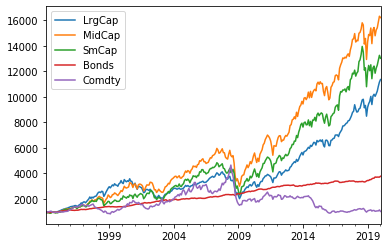

In [22]:
VAMI = 1000*(1+rors).cumprod()
VAMI.plot()

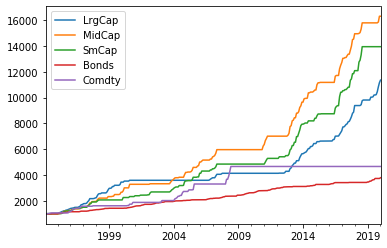

In [23]:
prev_peak = VAMI.cummax()
prev_peak.plot()

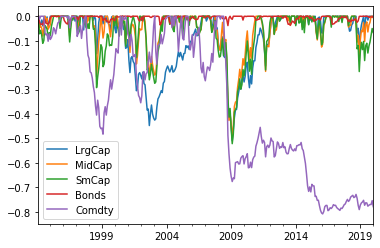

In [24]:
Drawdown = (VAMI - prev_peak)/prev_peak
Drawdown.plot()

In [25]:
Drawdown.min()

LrgCap   -0.509488
MidCap   -0.496167
SmCap    -0.521492
Bonds    -0.038288
Comdty   -0.808997
dtype: float64

In [33]:
Drawdown["2017":].idxmin()

LrgCap    2018-12
MidCap    2018-12
SmCap     2018-12
Bonds     2017-01
Comdty    2017-06
dtype: period[M]

In [0]:
def DD_Calc(monthly_returns):
  VAMI = 1000*(1+monthly_returns).cumprod()
  previous_peak = VAMI.cummax()
  drawdowns = VAMI/previous_peak-1
  return drawdowns.min()


In [49]:
DD_Calc(rors["2015":])

LrgCap   -0.135198
MidCap   -0.181835
SmCap    -0.226377
Bonds    -0.032796
Comdty   -0.387904
dtype: float64

In [0]:
def fin_stats(monthly_returns):
  annl_ror = (1+monthly_returns).prod()**(12/monthly_returns.count())-1
  annl_vol = monthly_returns.std()*(12**0.5)
  sharpe   = (annl_ror-0.03)/annl_vol
  worst_dd = DD_Calc(monthly_returns)
  calmar = annl_ror/worst_dd
  return pd.DataFrame({
      "Ann_ROR": annl_ror,
      "Ann_Vol": annl_vol,
      "Sharpe_Ratio": sharpe,
      "Worst_DrawDown": worst_dd,
      "Calmar_Ratio": calmar
  })


In [55]:
fin_stats(rors["2010":])

,Ann_ROR,Ann_Vol,Sharpe_Ratio,Worst_DrawDown,Calmar Ratio
LrgCap,0.136364,0.124050,0.857432,-0.162623,-0.838529
MidCap,0.125382,0.147828,0.645223,-0.225698,-0.555532
SmCap,0.130400,0.163983,0.612256,-0.226377,-0.576028
Bonds,0.038955,0.028996,0.308830,-0.036662,-1.062540
Comdty,-0.063882,0.187427,-0.500901,-0.649731,0.098321
